In [31]:
import scipy as sp
from scipy import stats
from ml_utilityfunc import *

class LinRegLearner:
    def __init__(self): 
        pass
        
    def train(self,X,Y):
        # fit a line to the data
        # find an m and a b --> parameters of linear model
        output = stats.linregress(X,Y) # use algo you want from SciPy and Numpy
        self.m = output.slope
        self.b = output.intercept
        
    def query(self,X):
        Y = self.m*X + self.b
        return Y

In [42]:
def test_run():
    # initialize training data
    start_datet = '2009-01-01'
    end_datet = '12-31-2010'
    datest = pd.date_range(start_datet,end_datet)
    symbols = ['SPY','XOM']
    df_train = get_data(symbols, datest, dropna=True)
    
    pred_win = 150
    learner = LinRegLearner()
    learner.train(df_train['XOM'][:-pred_win],df_train['SPY'][pred_win:])
    
    start_date = '2011-01-01'
    end_date = '12-31-2012'
    
    dates = pd.date_range(start_datet,end_datet)
    df_test = get_data(symbols, dates, dropna=True)
    
    ypredict = learner.query(df_test['XOM'][:-pred_win])
    
    plt.plot(ypredict,df_test['SPY'][pred_win:],'k.')
    print np.corrcoef(ypredict,df_test['SPY'][pred_win:])
    

[[ 1.          0.51188689]
 [ 0.51188689  1.        ]]


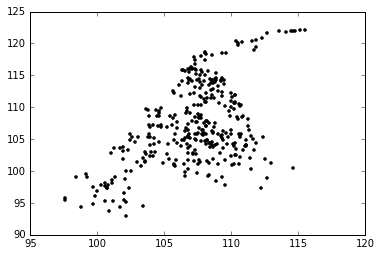

In [43]:
test_run()